In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pmdarima as pmd
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

### Read the data

In [134]:
df  = pd.read_csv('AAPL.csv')

In [135]:
df.shape

(10409, 7)

### Describe 


In [136]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09


In [137]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [138]:
df[df.isna()].sum() # no NA 

Date           0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: object

In [139]:
df['Moving_Avg'] = df['Close'].rolling(window=30).mean()

In [140]:
df['Date'] = pd.to_datetime(df['Date'])

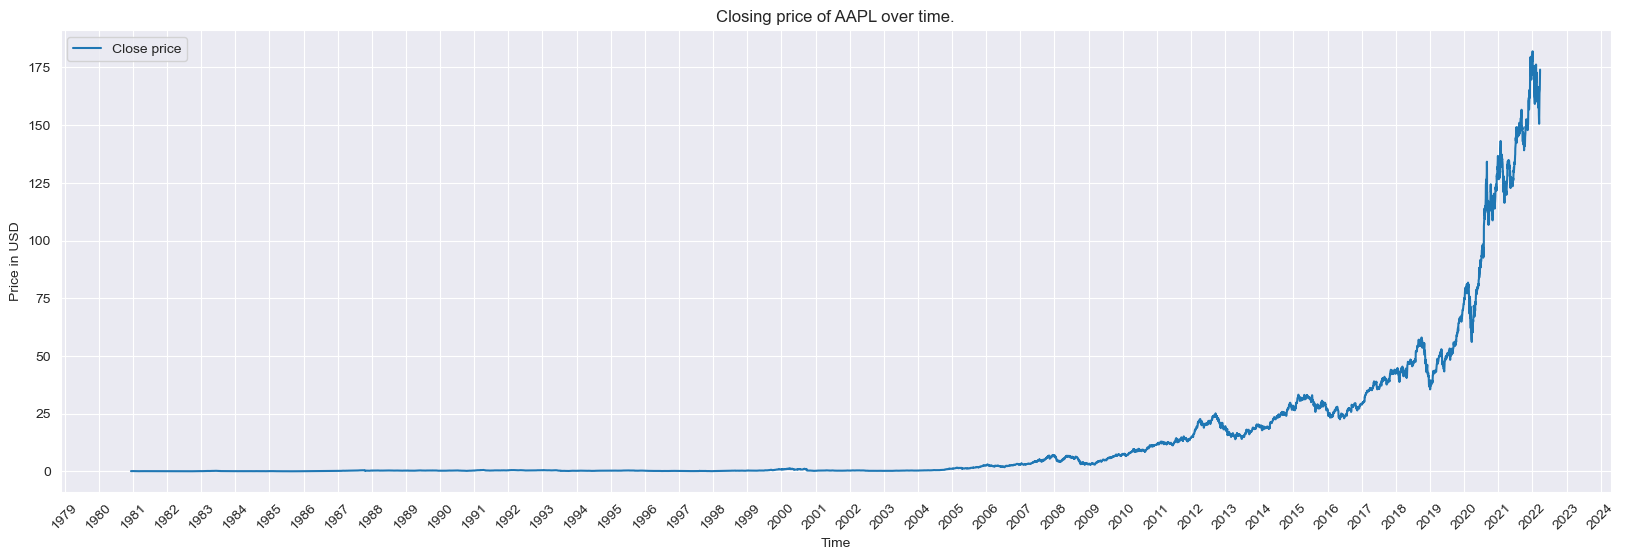

In [141]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Close'], label = 'Close price')
# plt.plot(df['Date'], df['Moving_Avg'], color='red', label='30-Day Moving Average', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time.")
plt.legend()
plt.savefig(f"daily_stock_price.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

In [142]:
df['Month_Year'] = df['Date'].dt.to_period('M')


In [143]:
last_days = df.groupby('Month_Year').tail(1)

# Reset the index if needed
last_days.reset_index(drop=True, inplace=True)
last_days.set_index('Month_Year')

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Avg
Month_Year,,,,,,,,
1980-12,1980-12-31,0.152902,0.152902,0.152344,0.152344,0.119080,35750400,NaN
1981-01,1981-01-30,0.127232,0.127232,0.126116,0.126116,0.098578,46188800,0.141871
1981-02,1981-02-27,0.118304,0.119420,0.118304,0.118304,0.092472,14761600,0.126339
1981-03,1981-03-31,0.110491,0.110491,0.109375,0.109375,0.085493,15993600,0.111495
1981-04,1981-04-30,0.126674,0.127790,0.126674,0.126674,0.099015,12611200,0.119364
...,...,...,...,...,...,...,...,...
2021-11,2021-11-30,159.990005,165.520004,159.919998,165.300003,165.089676,174048100,152.824668
2021-12,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300,170.110001
2022-01,2022-01-31,170.160004,175.000000,169.509995,174.779999,174.557602,115541600,171.926667


In [144]:
df = last_days

In [145]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Avg,Month_Year
0,1980-12-31,0.152902,0.152902,0.152344,0.152344,0.119080,35750400,NaN,1980-12
1,1981-01-30,0.127232,0.127232,0.126116,0.126116,0.098578,46188800,0.141871,1981-01
2,1981-02-27,0.118304,0.119420,0.118304,0.118304,0.092472,14761600,0.126339,1981-02
3,1981-03-31,0.110491,0.110491,0.109375,0.109375,0.085493,15993600,0.111495,1981-03
4,1981-04-30,0.126674,0.127790,0.126674,0.126674,0.099015,12611200,0.119364,1981-04
...,...,...,...,...,...,...,...,...,...
491,2021-11-30,159.990005,165.520004,159.919998,165.300003,165.089676,174048100,152.824668,2021-11
492,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300,170.110001,2021-12
493,2022-01-31,170.160004,175.000000,169.509995,174.779999,174.557602,115541600,171.926667,2022-01
494,2022-02-28,163.059998,165.419998,162.429993,165.119995,165.119995,94869100,168.273667,2022-02


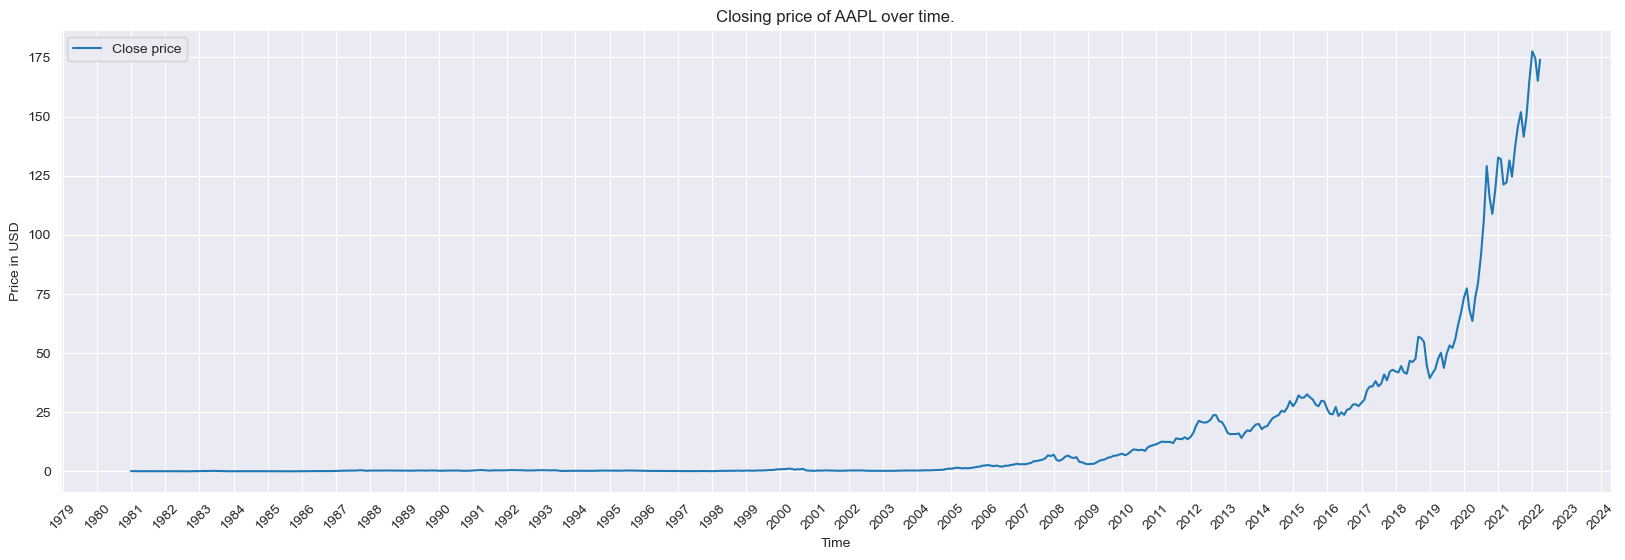

In [146]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'], df['Close'], label = 'Close price', )
# plt.plot(df['Date'], df['Moving_Avg'], color='red', label='14-Day Moving Average', alpha= 0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time.")
plt.legend()
plt.savefig(f"last_days_price.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

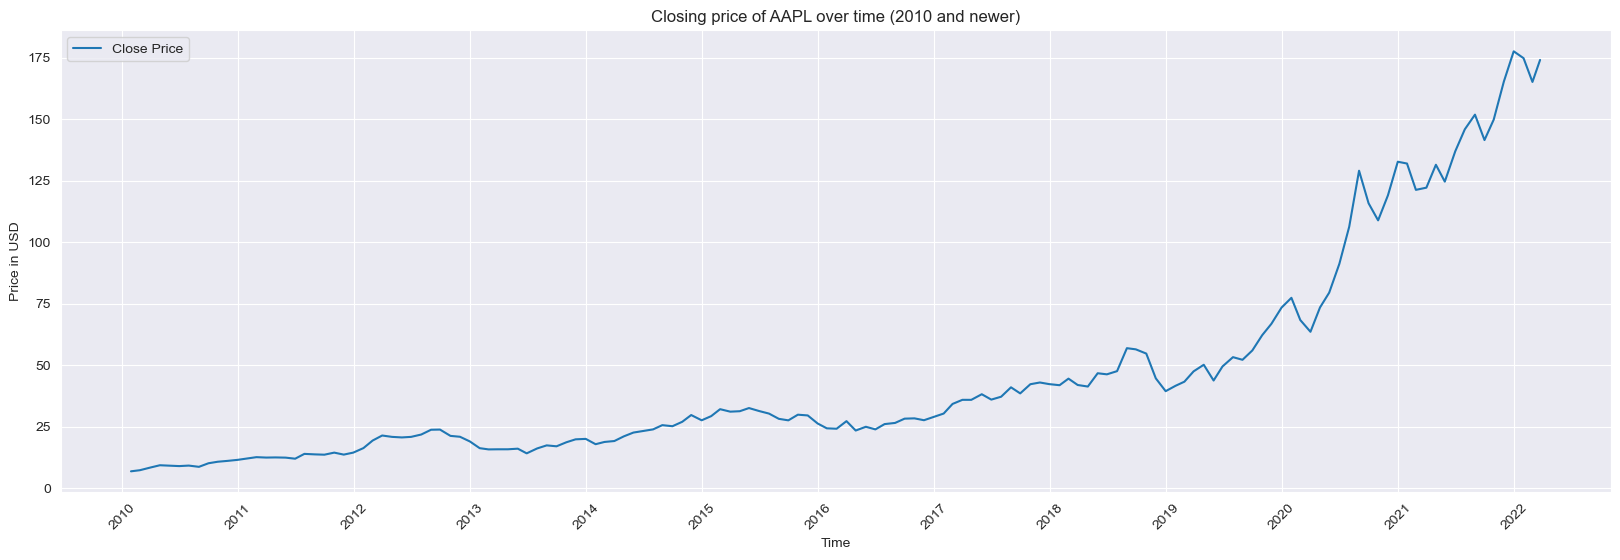

In [147]:
df = df[df['Date'] >= '2010-01-01'].copy()

df_new = df[df['Date'] >= '2010-01-01'].copy()
# df_new['Moving_Avg'] = df_new['Close'].rolling(window=14).mean()

plt.figure(figsize=(20, 6))
plt.plot(df_new['Date'], df_new['Close'], label='Close Price')
# plt.plot(df_new['Date'], df_new['Moving_Avg'], color='red', label='30-Day Moving Average')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time (2010 and newer)")
plt.savefig(f"last_day_stock_price_after_2010.pdf", format="pdf", dpi=500, bbox_inches = "tight")

plt.legend()
plt.show()

In [148]:
# df = df[df['Date'] >= '2013-01-01']

In [149]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Avg,Month_Year
349,2010-01-29,7.181429,7.221429,6.794643,6.859286,5.873430,1245952400,7.359190,2010-01
350,2010-02-26,7.227857,7.327500,7.214286,7.307857,6.257531,507460800,7.182512,2010-02
351,2010-03-31,8.410357,8.450357,8.373571,8.392857,7.186589,430659600,7.795012,2010-03
352,2010-04-30,9.618214,9.663214,9.321429,9.324643,7.984453,542463600,8.737667,2010-04
353,2010-05-28,9.263929,9.264286,9.048214,9.174286,7.855705,815614800,9.095571,2010-05
...,...,...,...,...,...,...,...,...,...
491,2021-11-30,159.990005,165.520004,159.919998,165.300003,165.089676,174048100,152.824668,2021-11
492,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300,170.110001,2021-12
493,2022-01-31,170.160004,175.000000,169.509995,174.779999,174.557602,115541600,171.926667,2022-01
494,2022-02-28,163.059998,165.419998,162.429993,165.119995,165.119995,94869100,168.273667,2022-02


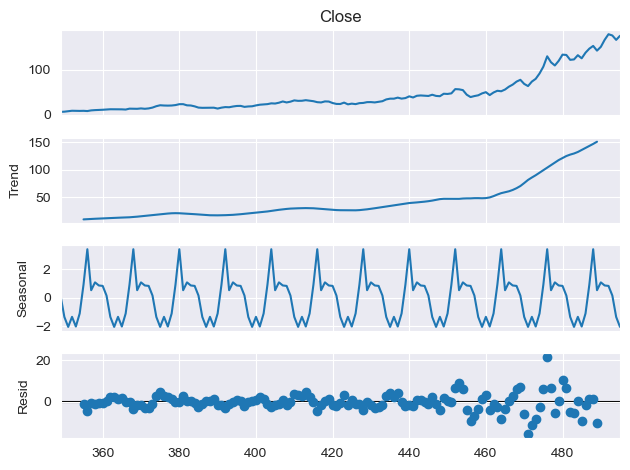

In [215]:
df_new.set_index('Date')
res = sm.tsa.seasonal_decompose(df_new['Close'], model='additive', period=12)
res.plot()
plt.savefig(f"decomposition.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

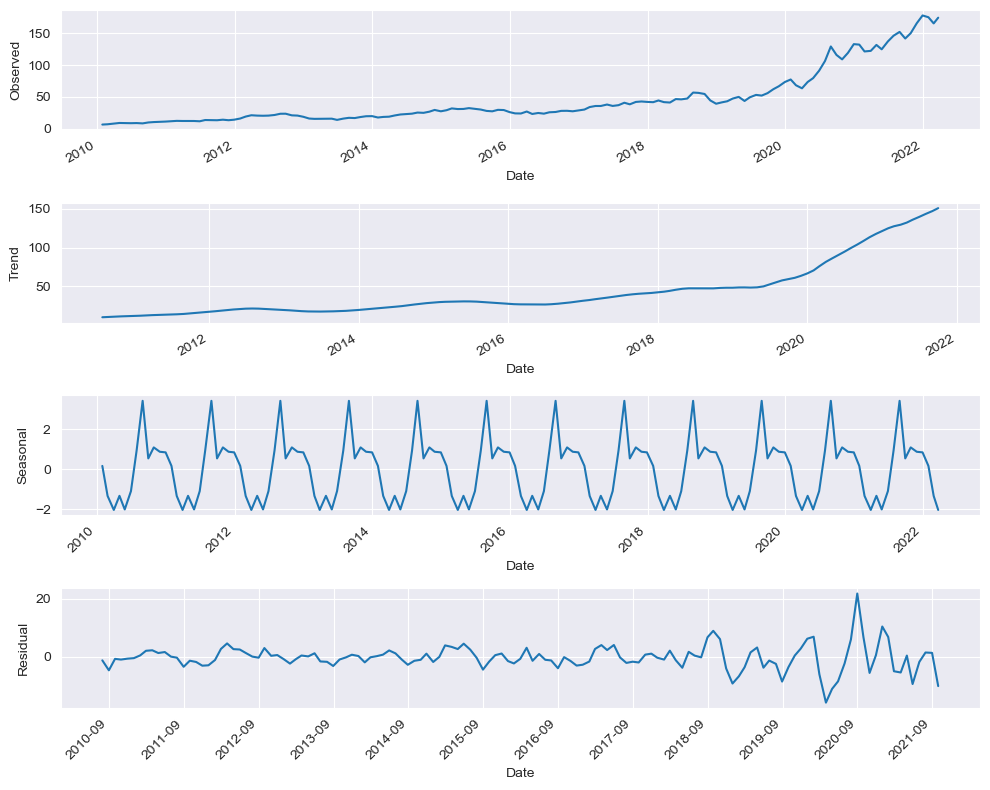

In [327]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates

# Assuming df_new is your DataFrame with 'Date' and 'Close' columns
# df_new.set_index('Date', inplace=True)

# Perform seasonal decomposition
res = sm.tsa.seasonal_decompose(df_new['Close'], model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

res.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

res.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

res.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
res.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

# Set x-axis to show only every nth tick
n = 12  # Change this to display every nth tick
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=n))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate date labels for better readability
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

# Adjust layout to fit the rotated labels
plt.tight_layout()

# Save and show the plot
plt.savefig("decomposition.pdf", format="pdf", dpi=500, bbox_inches="tight")
plt.show()


In [310]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_new is your DataFrame with 'Date' and 'Close' columns
# df_new.set_index('Date', inplace=True)

# Perform seasonal decomposition
res = sm.tsa.seasonal_decompose(df_new['Close'], model='additive', period=12)

# Extract month from index
df_new['Month'] = df_new.index.month

# Combine the seasonal component with the month
seasonal_with_month = pd.concat([res.seasonal, df_new['Month']], axis=1)

# Calculate the average seasonal component for each month
average_seasonal_by_month = seasonal_with_month.groupby('Month').mean()

print(average_seasonal_by_month)


       seasonal
Month          
1      0.160855
2     -1.338747
3     -2.036364
4     -1.332132
5     -2.010804
6     -1.097461
7      0.924756
8      3.407698
9      0.535216
10     1.083857
11     0.866922
12     0.836203


In [151]:
[i for i in range(df.shape[0])]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146]

In [152]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract month as a numerical value and create a new column 'Month'
df['Month'] = df['Date'].dt.month

In [153]:
X = [i for i in range(df.shape[0])]
y = df['Close']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Print the model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                              789.3
Date:                Mon, 03 Jun 2024   Prob (F-statistic):                    9.40e-61
Time:                        17:29:22   Log-Likelihood:                         -679.28
No. Observations:                 147   AIC:                                      1361.
Df Residuals:                     146   BIC:                                      1364.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [154]:
X = df['Month']
y = df['Close']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Print the model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.430
Model:                            OLS   Adj. R-squared (uncentered):              0.426
Method:                 Least Squares   F-statistic:                              110.2
Date:                Mon, 03 Jun 2024   Prob (F-statistic):                    1.47e-19
Time:                        17:29:22   Log-Likelihood:                         -774.46
No. Observations:                 147   AIC:                                      1551.
Df Residuals:                     146   BIC:                                      1554.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

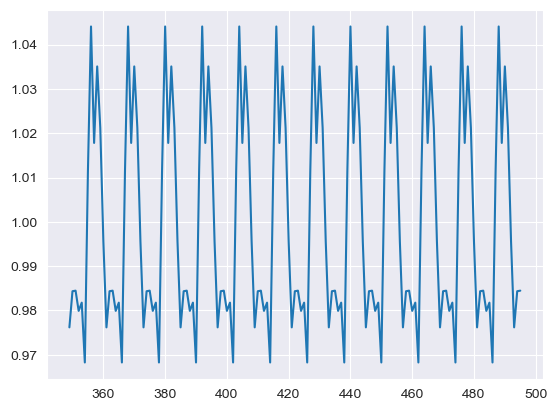

In [155]:
res.seasonal.plot()
plt.show()

### Testing ACF and PACF


- ACF decays slowly
- PACF cuts off sharply at lag 1


-> autoregressive process AR(1) 

In [156]:
df['Close_diff'] = df['Close'] - df['Close'].shift()
df['Close_second_diff'] = df['Close'].diff().diff()
df_train = df[df['Date'] <= '2021-01-01'].copy()
df_train = df_train[df_train['Date'] >= '2010-01-01'].copy()
df_test  = df[df['Date'] >= '2021-01-01'].copy()

In [157]:
def test_stationarity(df, col):
    result = sm.tsa.adfuller(df[col])
    
    adf_statistic = result[0]
    p_value = result[1]
    used_lag = result[2]
    n_obs = result[3]
    critical_values = result[4]
    ic_best = result[5]
    
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Used Lag: {used_lag}')
    print(f'Number of Observations Used: {n_obs}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')
    print(f'Best Information Criterion: {ic_best}')
    
    # Interpret the result
    if p_value < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")

In [158]:
test_stationarity(df, 'Close')

ADF Statistic: 2.6769867234970346
p-value: 0.999085457010505
Used Lag: 13
Number of Observations Used: 133
Critical Values:
   1%: -3.480500383888377
   5%: -2.8835279559405045
   10%: -2.578495716547007
Best Information Criterion: 782.5942336546046
The time series is not stationary.


In [159]:
df['Close_diff'] = df['Close'].diff()
df.dropna(inplace=True)
test_stationarity(df, 'Close_diff')

ADF Statistic: -1.6088925978452895
p-value: 0.47912508220137107
Used Lag: 12
Number of Observations Used: 132
Critical Values:
   1%: -3.4808880719210005
   5%: -2.8836966192225284
   10%: -2.5785857598714417
Best Information Criterion: 778.6782545817427
The time series is not stationary.


In [160]:
df.dropna(inplace=True)
test_stationarity(df, 'Close_second_diff')

ADF Statistic: -6.2307174982515985
p-value: 4.961262327973826e-08
Used Lag: 14
Number of Observations Used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Best Information Criterion: 765.5029885483087
The time series is stationary.


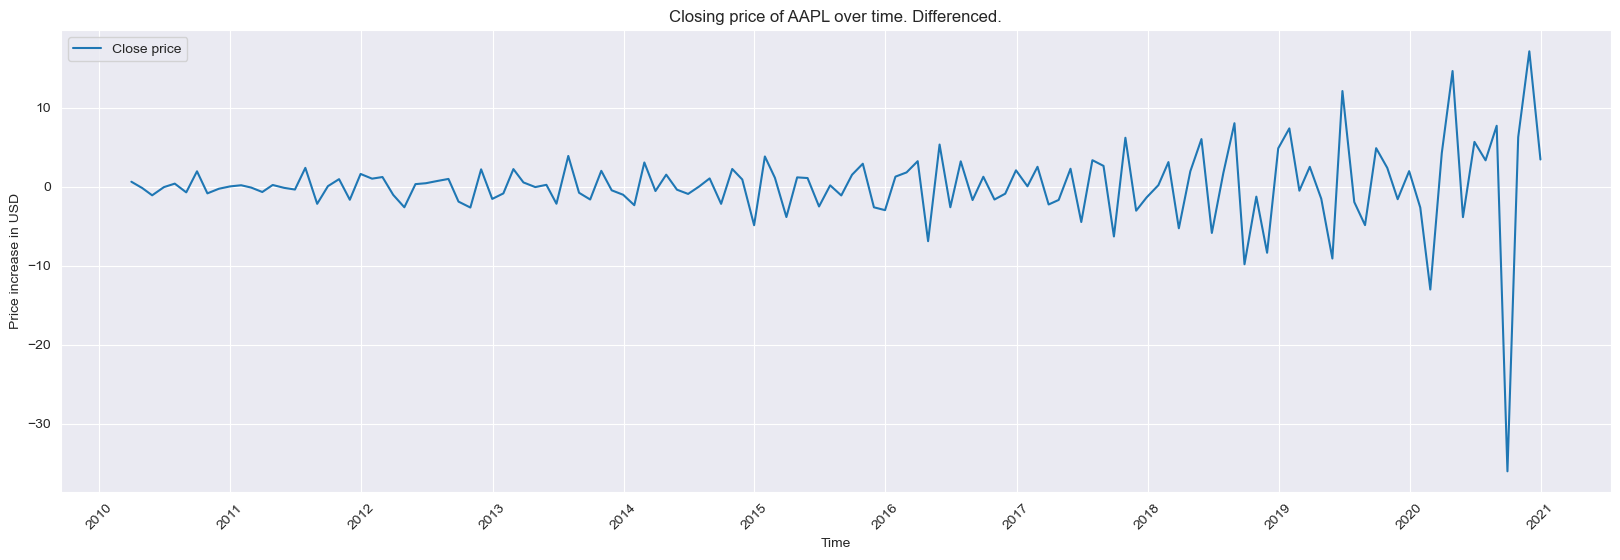

In [161]:
plt.figure(figsize=(20,6))
plt.plot(df_train['Date'], df_train['Close_second_diff'], label = 'Close price')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time. Differenced.")
plt.legend()
plt.savefig(f"differenced_2.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

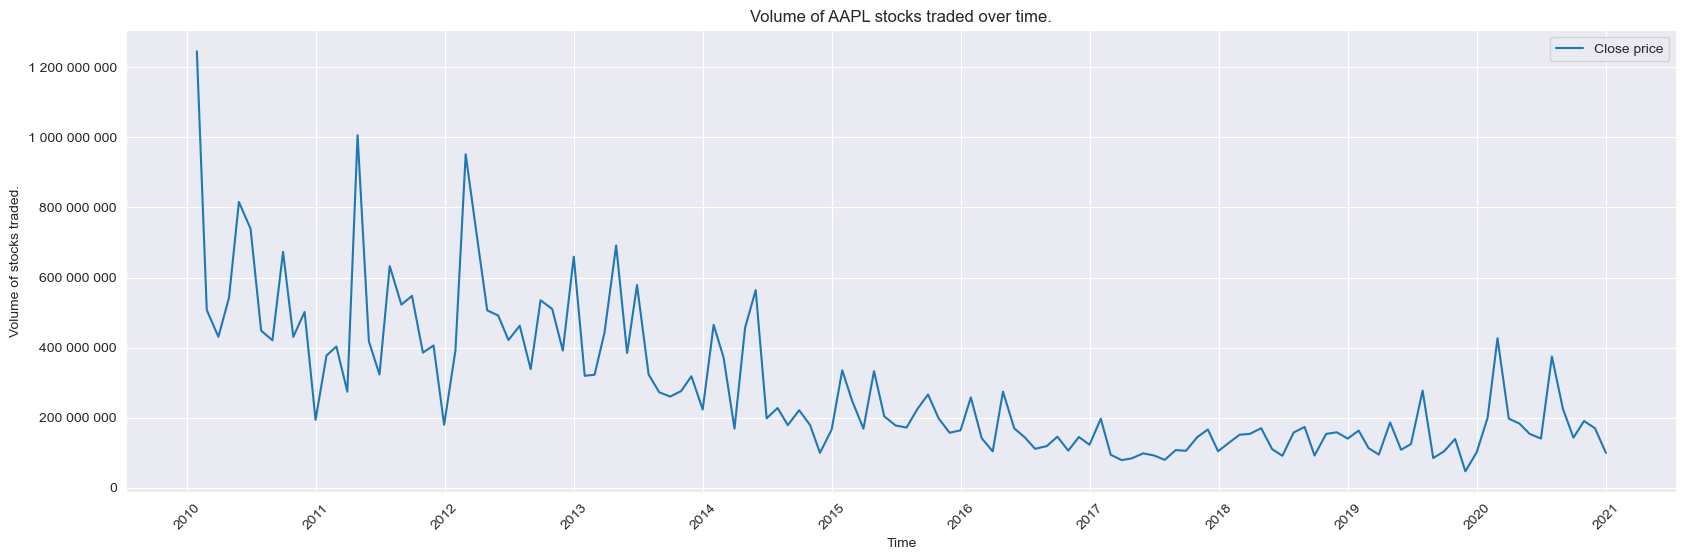

In [162]:
def format_with_spaces(x, pos):
    return f'{x:,.0f}'.replace(',', ' ')

plt.figure(figsize=(20,6))
plt.plot(df_train['Date'], df_train['Volume'], label = 'Close price')
plt.ticklabel_format(style= 'plain', axis = 'y')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_spaces))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Volume of stocks traded.')
plt.xlabel('Time')
plt.title("Volume of AAPL stocks traded over time.")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

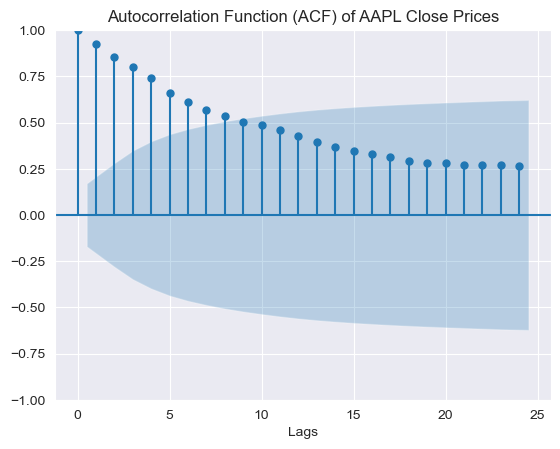

<Figure size 1200x600 with 0 Axes>

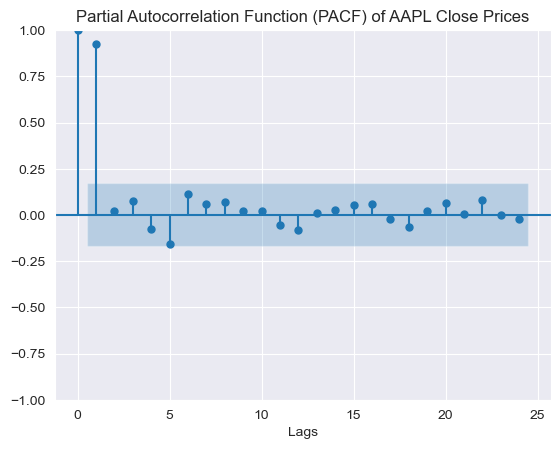

In [163]:
#Plot ACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df_train['Close'].dropna(), lags=24)
plt.title('Autocorrelation Function (ACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"acf.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(df_train['Close'].dropna(), lags=24)
plt.title('Partial Autocorrelation Function (PACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"pacf.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

<Figure size 1000x600 with 0 Axes>

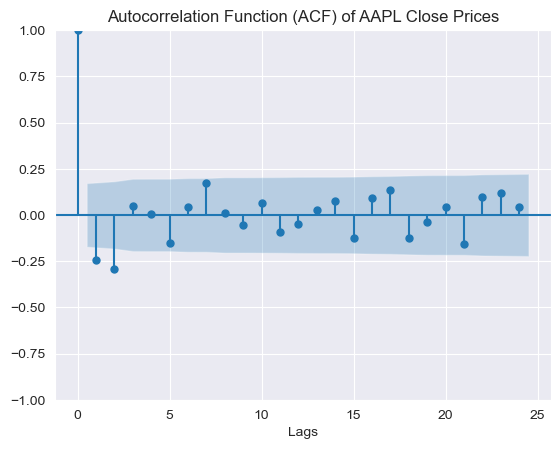

<Figure size 1200x600 with 0 Axes>

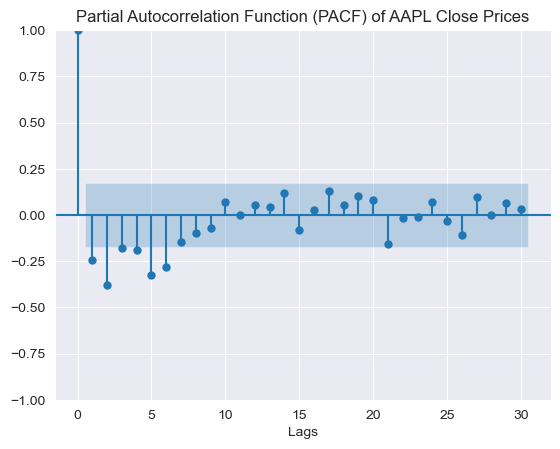

In [164]:
#Plot ACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df_train['Close_second_diff'].dropna(), lags=24)
plt.title('Autocorrelation Function (ACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"acf.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(df_train['Close_second_diff'].dropna(), lags=30)
plt.title('Partial Autocorrelation Function (PACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"pacf.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

In [165]:
# df_train.dropna(inplace=True)
# pmd.auto_arima(df_train['Close'],start_p=1,start_q=1,test='adf',m=12,seasonal=True, trace=True)

In [166]:
# import itertools
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import warnings
# # Define the p, d, q, P, D, Q parameters to take any value between 0 and 2
# p = d = q = range(0, 3)
# P = D = Q = range(0, 3)
# s = [12]  # typically 12 for monthly data
# 
# # Generate all different combinations of p, d, q triplets
# pdq = list(itertools.product(p, d, q))
# # Generate all different combinations of seasonal p, d, q triplets
# seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in list(itertools.product(P, D, Q))]
# 
# results = []
# 
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = SARIMAX(df_train['Close'],
#                           order=param,
#                           seasonal_order=param_seasonal,
#                           enforce_stationarity=False,
#                           enforce_invertibility=False)
#             results_fit = mod.fit()
#             results.append([param, param_seasonal, results_fit.aic, results_fit.bic])
#         except:
#             continue
# 
# results_df = pd.DataFrame(results, columns=['param', 'param_seasonal', 'AIC', 'BIC'])
# 
# # Sort the DataFrame based on AIC and BIC
# results_df = results_df.sort_values(by=['AIC', 'BIC']).reset_index(drop=True)
# 
# print(results_df.head())

In [167]:
sarima=sm.tsa.SARIMAX(df_train['Close'].dropna(),order=(2,2,2),seasonal_order=(2,2,2,12))
model = sarima.fit()
predicted = model.predict()
print(model.aic)
print(model.bic)

C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


663.0651848581201
687.0361367051287


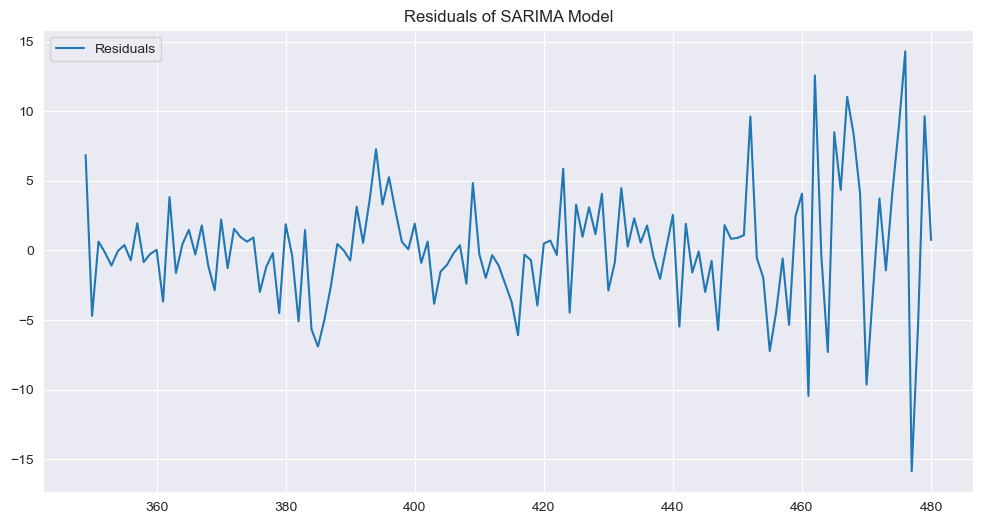

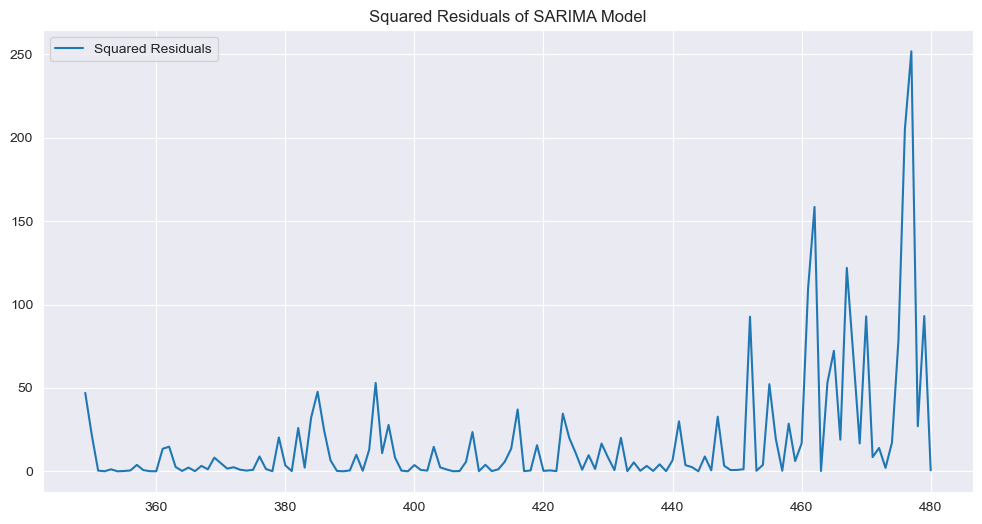

In [168]:
residuals = model.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of SARIMA Model')
plt.legend()
plt.grid(True)
plt.savefig(f"sarima_residuals.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

# Plot the squared residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals**2, label='Squared Residuals')
plt.title('Squared Residuals of SARIMA Model')
plt.legend()
plt.grid(True)
plt.savefig(f"sarima_squared_residuals.pdf", format="pdf", dpi=500, bbox_inches = "tight")

plt.show()

In [169]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
result = acorr_ljungbox(residuals)
print(result)


     lb_stat  lb_pvalue
1   0.004424   0.946969
2   0.316782   0.853516
3   3.198064   0.362084
4   3.960374   0.411395
5   4.247716   0.514330
6   4.267685   0.640501
7   5.039529   0.655139
8   5.557755   0.696633
9   6.727023   0.665516
10  7.246869   0.701951


In [170]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, sm.add_constant(model.fittedvalues))
bp_test_statistic = bp_test[0]
bp_test_pvalue = bp_test[1]

print(f'Breusch-Pagan test statistic: {bp_test_statistic}')
print(f'Breusch-Pagan test p-value: {bp_test_pvalue}')

Breusch-Pagan test statistic: 39.723003558238446
Breusch-Pagan test p-value: 2.9265808710181967e-10


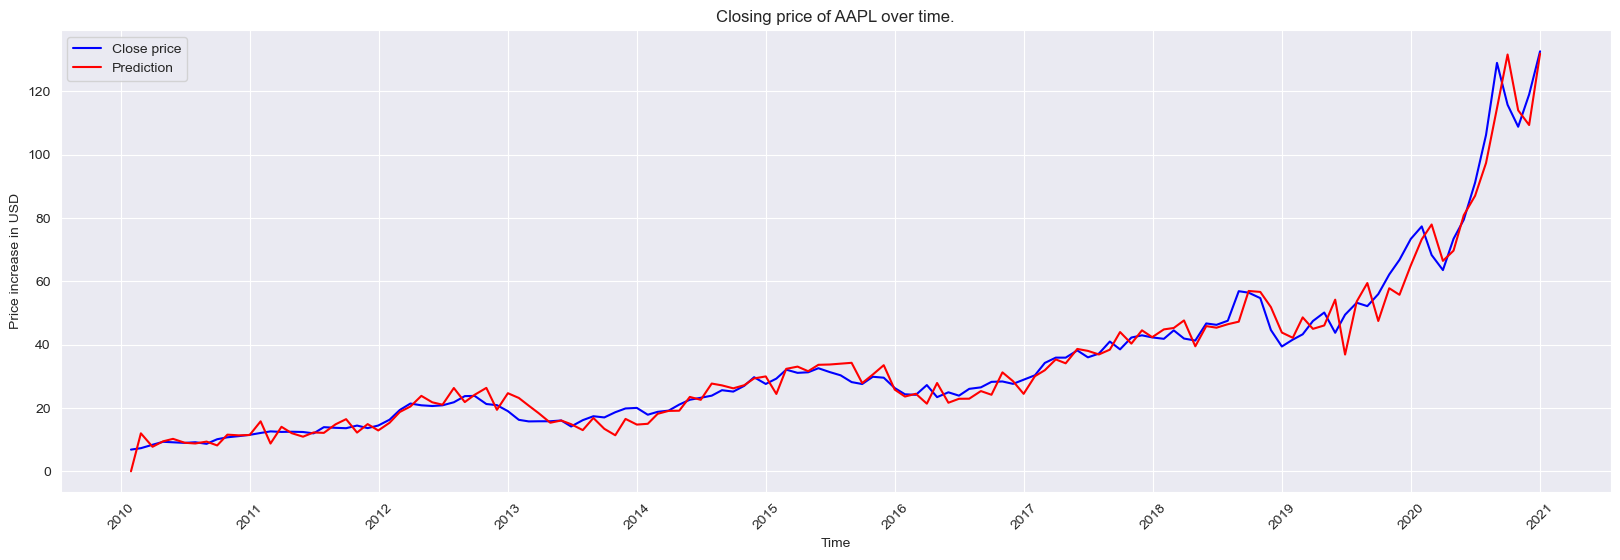

C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [171]:
plt.figure(figsize=(20,6))
plt.plot(df_train['Date'], df_train['Close'], label = 'Close price', color='blue')
plt.plot(df_train['Date'], predicted, label = 'Prediction', color='red')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time.")
plt.legend()
plt.savefig(f"sarima_fit.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()
MSE(df_train['Close'], predicted)
forecast = model.forecast(15, exog = None)


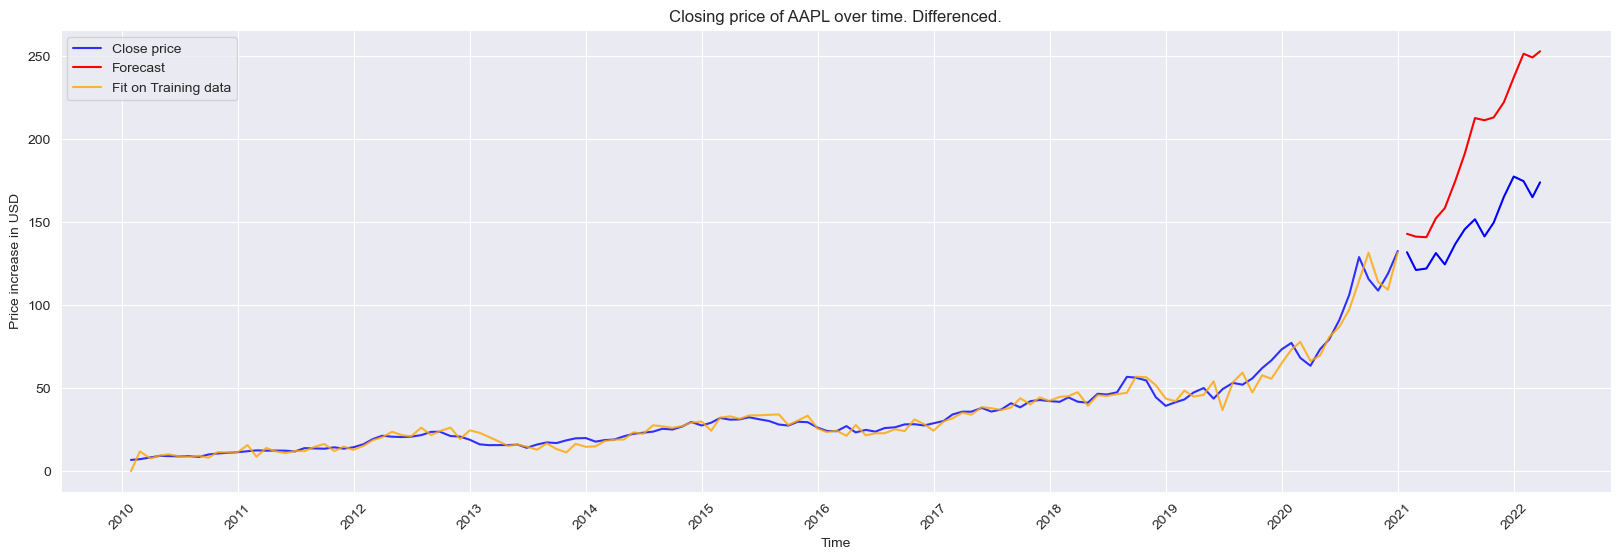

18.3457512926514
2975.3219712046684
2.973654907736755
49.28437915315065


In [172]:
plt.figure(figsize=(20,6))
plt.plot(df_train['Date'], df_train['Close'], label = 'Close price', color='blue', alpha= 0.8)
plt.plot(df_test['Date'], df_test['Close'], color='blue')
plt.plot(df_test['Date'], forecast, label = 'Forecast', color='red')
plt.plot(df_train['Date'], predicted, label = 'Fit on Training data', color='orange', alpha = 0.8)

# plt.plot(df_test['Date'], forecast, label = 'Prediction', color='yellow')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Closing price of AAPL over time. Differenced.")
plt.legend()
plt.show()

print(MSE(df_train['Close'], predicted))
print(MSE(df_test['Close'], forecast))


print(MAE(df_train['Close'], predicted))
print(MAE(df_test['Close'], forecast))

          Date      Open      High       Low     Close  Adj Close     Volume  \
351 2010-03-31  8.410357  8.450357  8.373571  8.392857   7.186589  430659600   
352 2010-04-30  9.618214  9.663214  9.321429  9.324643   7.984453  542463600   
353 2010-05-28  9.263929  9.264286  9.048214  9.174286   7.855705  815614800   
354 2010-06-30  9.168214  9.213214  8.928929  8.983214   7.692095  739452000   
355 2010-07-30  9.138929  9.275000  9.103571  9.187500   7.867022  448210000   

     Moving_Avg Month_Year  Month  Close_diff  Close_second_diff  Log_Close  
351    7.795012    2010-03      3    1.085000           0.636429   2.127381  
352    8.737667    2010-04      4    0.931786          -0.153214   2.232661  
353    9.095571    2010-05      5   -0.150357          -1.082143   2.216405  
354    9.190405    2010-06      6   -0.191072          -0.040715   2.195358  
355    9.231798    2010-07      7    0.204286           0.395358   2.217844  


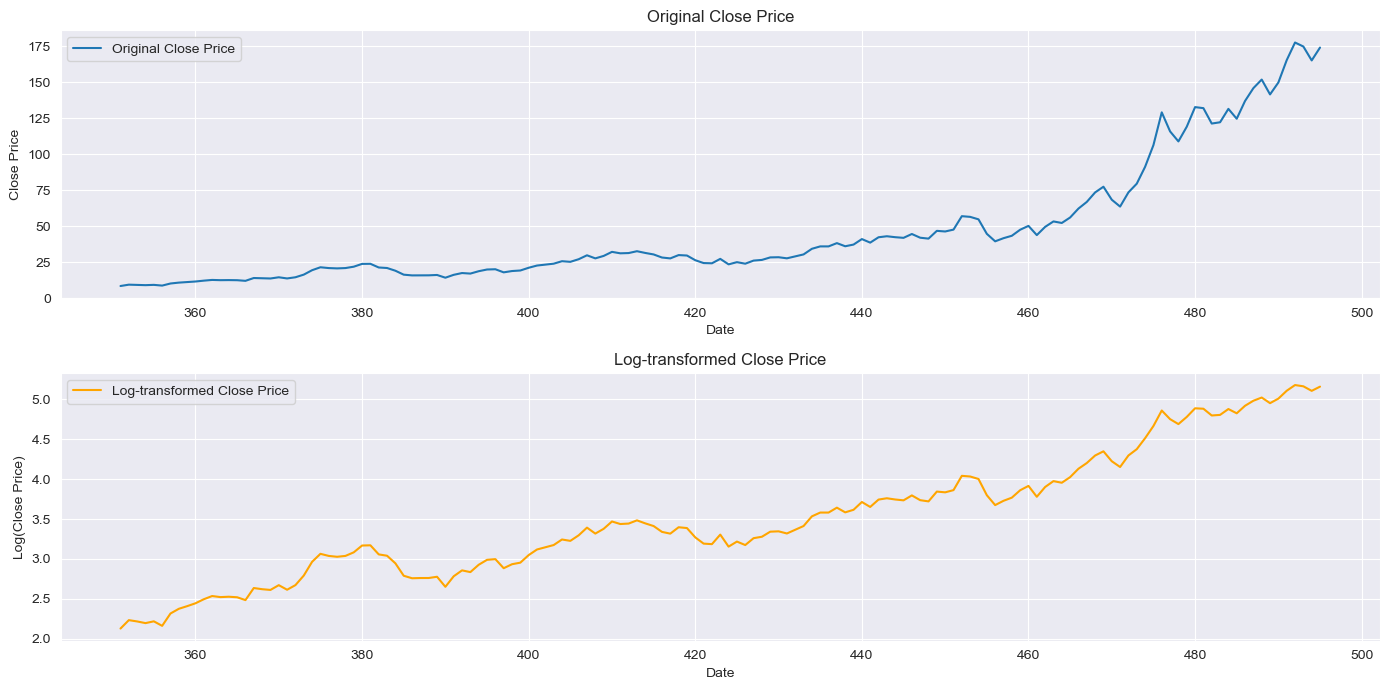

In [173]:
df['Log_Close'] = np.log(df['Close'])

# Display the first few rows to verify the transformation
print(df.head())

# Plot the original and log-transformed Close price for comparison
plt.figure(figsize=(14, 7))

# Original Close price plot
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Original Close Price')
plt.title('Original Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Log-transformed Close price plot
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Log_Close'], label='Log-transformed Close Price', color='orange')
plt.title('Log-transformed Close Price')
plt.xlabel('Date')
plt.ylabel('Log(Close Price)')
plt.legend()

plt.tight_layout()
plt.show()

In [174]:
df['Close_diff'] = df['Close'] - df['Close'].shift()
df['Log_Close_Diff'] = df['Log_Close'] - df['Log_Close'].shift()
df.dropna(inplace=True)
df_train = df[df['Date'] <= '2021-01-01'].copy()
df_train = df_train[df_train['Date'] >= '2010-01-01'].copy()
df_test  = df[df['Date'] >= '2021-01-01'].copy()

In [175]:
test_stationarity(df, 'Log_Close')

ADF Statistic: 0.18902041650101373
p-value: 0.9716390152963914
Used Lag: 0
Number of Observations Used: 143
Critical Values:
   1%: -3.4769274060112707
   5%: -2.8819726324025625
   10%: -2.577665408088415
Best Information Criterion: -289.0838358452462
The time series is not stationary.


In [176]:
df['Log_Close_Diff']

352    0.105280
353   -0.016256
354   -0.021047
355    0.022486
356   -0.056575
         ...   
491    0.098461
492    0.071603
493   -0.015837
494   -0.056856
495    0.052785
Name: Log_Close_Diff, Length: 144, dtype: float64

In [177]:
test_stationarity(df, 'Log_Close_Diff')

ADF Statistic: -8.945580939012292
p-value: 9.007630607386994e-15
Used Lag: 1
Number of Observations Used: 142
Critical Values:
   1%: -3.477261624048995
   5%: -2.8821181874544233
   10%: -2.5777431104939494
Best Information Criterion: -290.3059054297597
The time series is stationary.


<Figure size 1000x600 with 0 Axes>

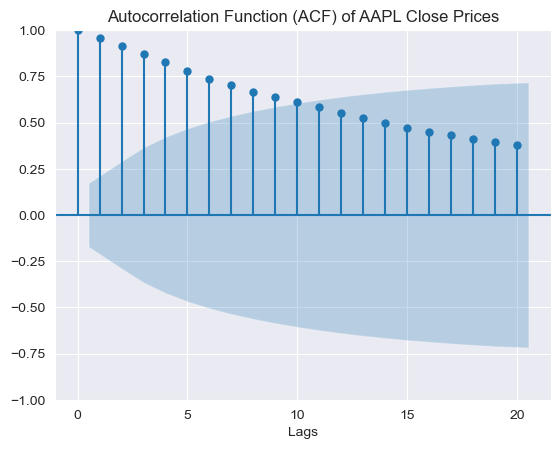

<Figure size 1200x600 with 0 Axes>

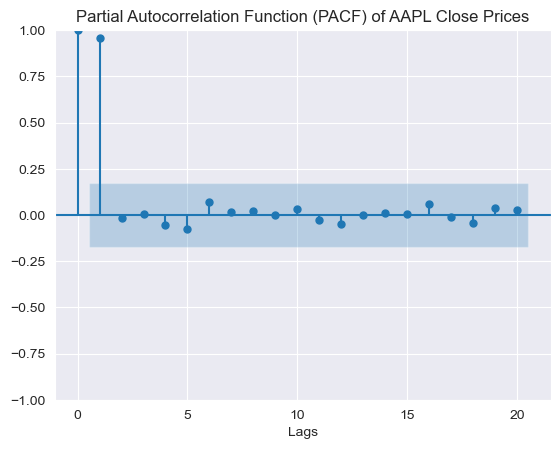

In [178]:
#Plot ACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df_train['Log_Close'].dropna(), lags=20)
plt.title('Autocorrelation Function (ACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"acf_log.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(df_train['Log_Close'].dropna(), lags=20)
plt.title('Partial Autocorrelation Function (PACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"pacf_log.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

<Figure size 1000x600 with 0 Axes>

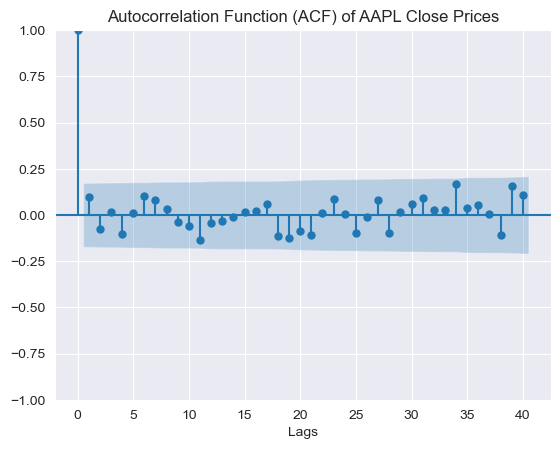

<Figure size 1200x600 with 0 Axes>

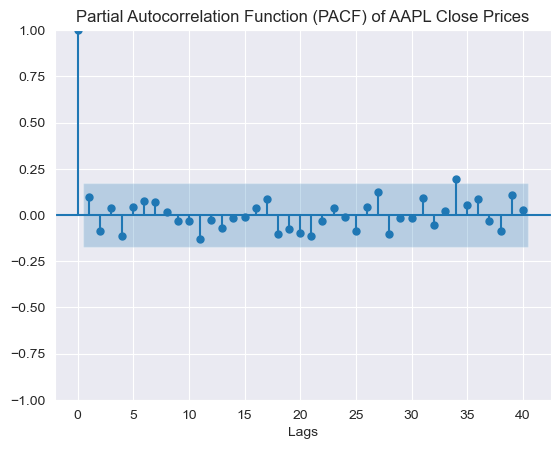

In [179]:
#Plot ACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(df_train['Log_Close_Diff'].dropna(), lags=40)
plt.title('Autocorrelation Function (ACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"acf_log.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(df_train['Log_Close_Diff'].dropna(), lags=40)
plt.title('Partial Autocorrelation Function (PACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"pacf_log.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

In [288]:
sarima=sm.tsa.SARIMAX(df_train['Log_Close'],order=(1,1,0), seasonal_order=(1,1,1,12))
model = sarima.fit()
predicted = model.predict()
predicted
forecast = model.forecast(15, exog = None)
print(model.aic)

C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


-229.38673393150523


C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [289]:
forecast = model.get_forecast(steps=15)
forecast_values = np.exp(forecast.predicted_mean)
confidence_intervals = np.exp(forecast.conf_int())

# Lower and Upper confidence intervals
lower_ci = confidence_intervals.iloc[:, 0]
upper_ci = confidence_intervals.iloc[:, 1]

print("Forecasted values:", forecast_values)
print("Lower confidence interval:", lower_ci)
print("Upper confidence interval:", upper_ci)

Forecasted values: 129    134.689914
130    141.804934
131    145.537930
132    146.151192
133    149.535436
134    148.372682
135    157.622993
136    164.910457
137    166.291332
138    172.658642
139    172.554590
140    170.454521
141    171.177351
142    178.031786
143    181.589960
Name: predicted_mean, dtype: float64
Lower confidence interval: 129    115.010714
130    112.012457
131    108.370689
132    103.607898
133    101.576744
134     96.987502
135     99.467482
136    100.716322
137     98.491177
138     99.341446
139     96.585259
140     92.934566
141     90.816007
142     91.992749
143     91.478645
Name: lower Log_Close, dtype: float64
Upper confidence interval: 129    157.736373
130    179.521455
131    195.452195
132    206.163538
133    220.137463
134    226.982369
135    249.780204
136    270.020374
137    280.764307
138    300.086297
139    308.277753
140    312.636570
141    322.648907
142    344.541465
143    360.465699
Name: upper Log_Close, dtype: float64


C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [290]:
# plt.figure(figsize=(20,6))
# plt.plot(df_train['Date'], df_train['Log_Close'], label = 'Log-Close price', color='blue')
# plt.plot(df_train['Date'], predicted, label = 'Prediction', color='red')
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.ylabel('Price increase in USD')
# plt.xlabel('Time')
# plt.title("Increase in closing price of AAPL over time.")
# plt.legend()
# plt.savefig(f"log_fit.pdf", format="pdf", dpi=500, bbox_inches = "tight")
# plt.show()
# MSE(df_train['Close'], predicted)
# forecast = model.forecast(15, exog = None)
# forecast_ci = model.get_forecast(steps=15).conf_int()


365    0.009665
366   -0.015590
367    0.130344
368    0.027988
369   -0.168354
         ...   
476    0.141613
477   -0.134877
478   -0.087129
479    0.110641
480    0.123485
Length: 116, dtype: float64
365    0.009665
366   -0.015590
367    0.130344
368    0.027988
369   -0.168354
         ...   
476    0.141613
477   -0.134877
478   -0.087129
479    0.110641
480    0.123485
Length: 116, dtype: float64


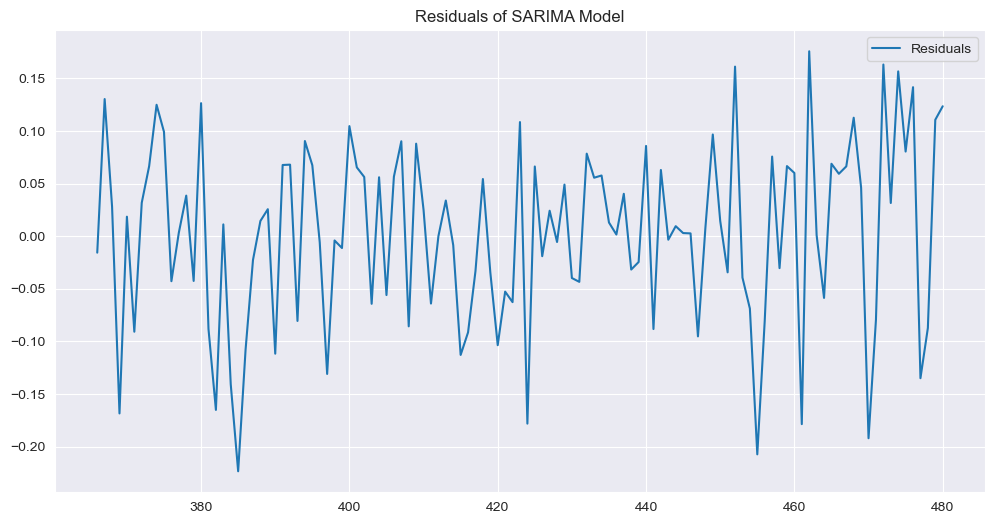

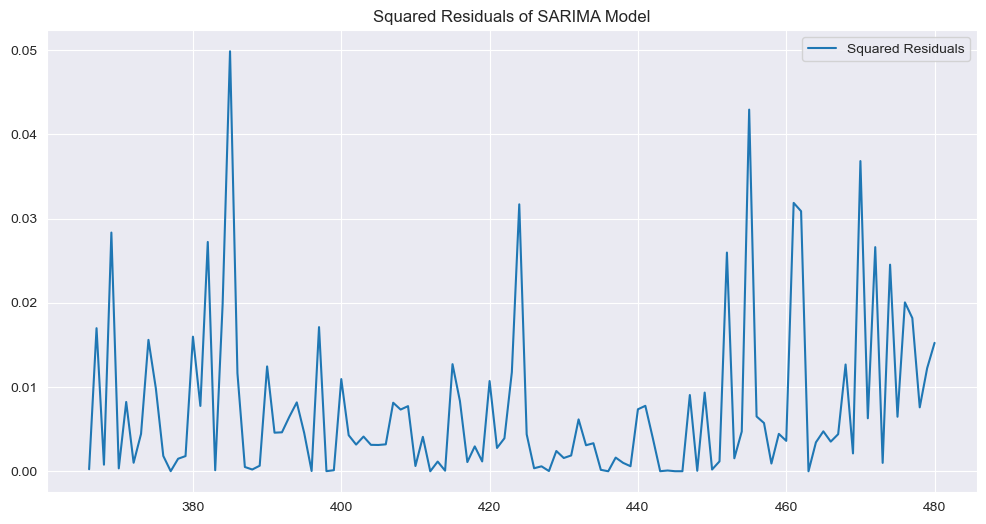

In [291]:
residuals = model.resid[13:]
print(residuals)
# residuals = np.exp(model.resid)[13:]
print(residuals)
plt.figure(figsize=(12, 6))
plt.plot(residuals[1:], label='Residuals')
plt.title('Residuals of SARIMA Model')
plt.legend()
plt.savefig(f"log_residuals.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

# Plot the squared residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals[1:]**2, label='Squared Residuals')
plt.title('Squared Residuals of SARIMA Model')
plt.legend()
plt.savefig(f"log_squared_residuals.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()



<Figure size 1000x600 with 0 Axes>

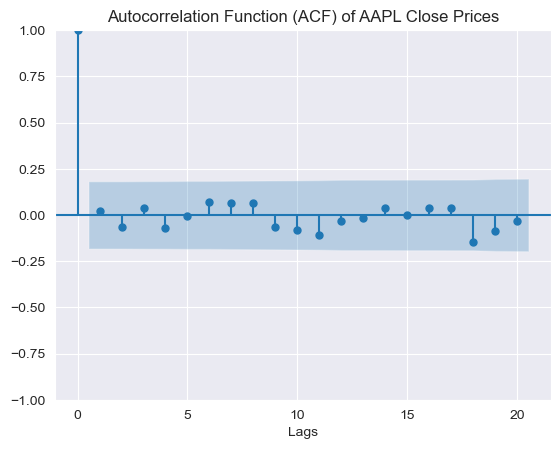

<Figure size 1200x600 with 0 Axes>

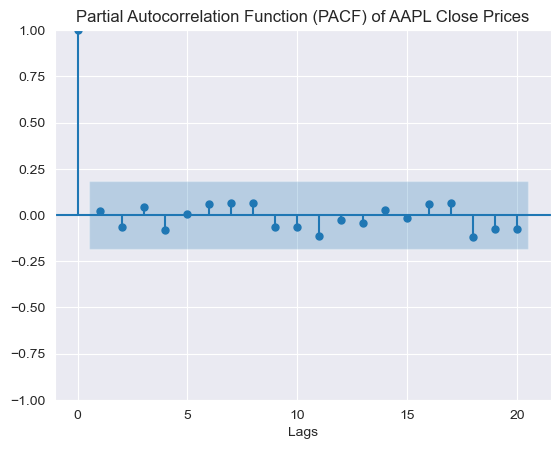

In [292]:
#Plot ACF
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.title('Autocorrelation Function (ACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"acf_log_res.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(residuals, lags=20)
plt.title('Partial Autocorrelation Function (PACF) of AAPL Close Prices')
plt.xlabel('Lags')
plt.savefig(f"pacf_log_res.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

In [293]:
result = acorr_ljungbox(residuals)
print(result)

     lb_stat  lb_pvalue
1   0.061562   0.804044
2   0.573704   0.750623
3   0.751699   0.860982
4   1.394426   0.845163
5   1.397628   0.924573
6   2.041185   0.915872
7   2.542557   0.923859
8   3.049139   0.931236
9   3.577287   0.936972
10  4.394120   0.927821


In [294]:
residuals

365    0.009665
366   -0.015590
367    0.130344
368    0.027988
369   -0.168354
         ...   
476    0.141613
477   -0.134877
478   -0.087129
479    0.110641
480    0.123485
Length: 116, dtype: float64

In [295]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, np.exp(sm.add_constant(model.fittedvalues))[13:])
bp_test_statistic = bp_test[0]
bp_test_pvalue = bp_test[1]

print(f'Breusch-Pagan test statistic: {bp_test_statistic}')
print(f'Breusch-Pagan test p-value: {bp_test_pvalue}')

Breusch-Pagan test statistic: 5.915638937152254
Breusch-Pagan test p-value: 0.015007059376931317


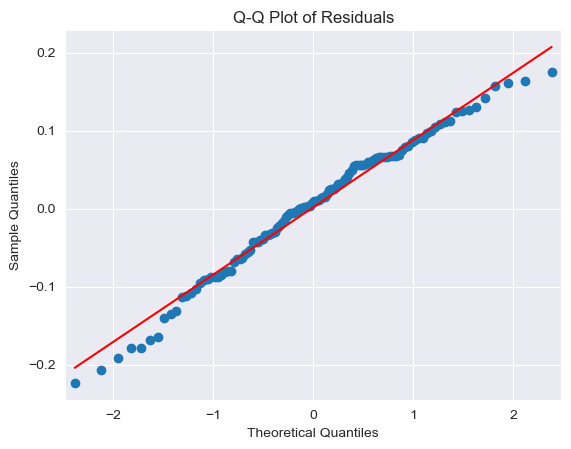

In [296]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [297]:
from scipy.stats import shapiro, kstest, anderson, norm

shapiro_test = shapiro(residuals)
print('Shapiro-Wilk Test:')
print(f'Statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')

Shapiro-Wilk Test:
Statistic: 0.9826390582832871, p-value: 0.13926208092513093


In [298]:
residuals

365    0.009665
366   -0.015590
367    0.130344
368    0.027988
369   -0.168354
         ...   
476    0.141613
477   -0.134877
478   -0.087129
479    0.110641
480    0.123485
Length: 116, dtype: float64

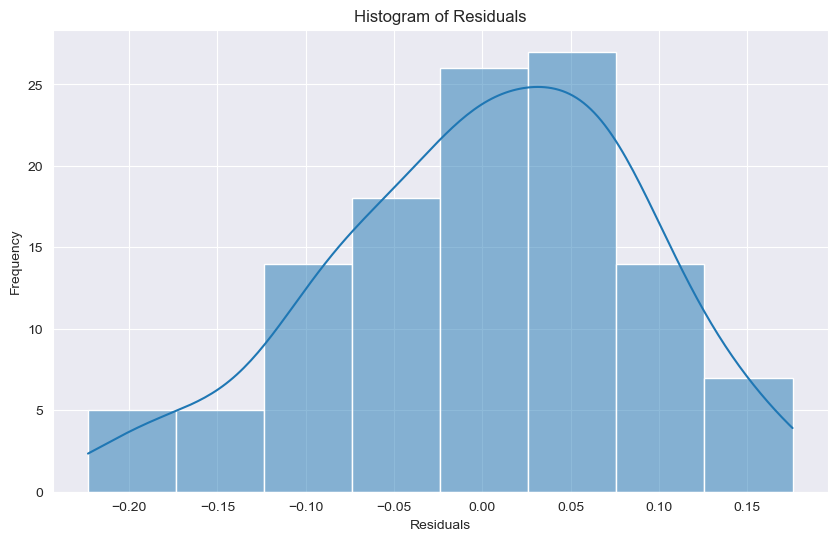

In [299]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig(f"residual_hist.pdf", format="pdf", dpi=500, bbox_inches = "tight")
plt.show()

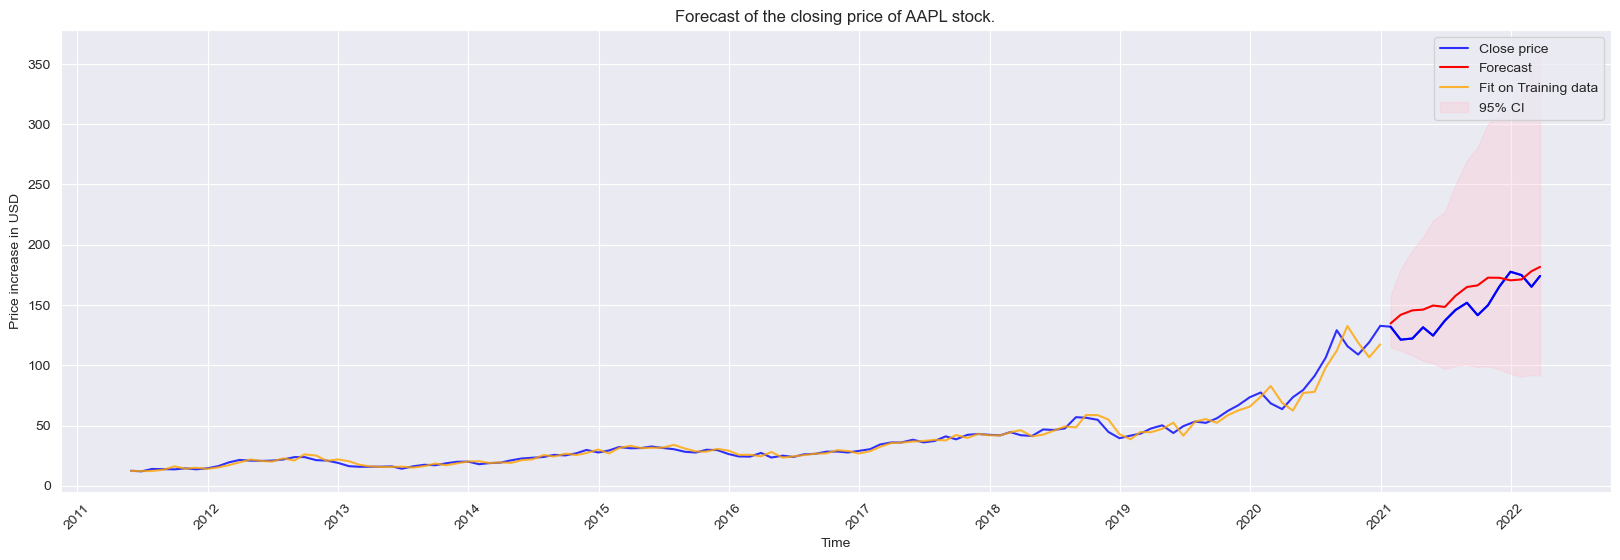

In [332]:
# lower_ci = np.exp(forecast_ci.iloc[:, 0])
# upper_ci = np.exp(forecast_ci.iloc[:, 1])

plt.figure(figsize=(20, 6))
plt.plot(df['Date'][13:], df['Close'][13:], label='Close price', color='blue', alpha=0.8)
plt.plot(df_test['Date'], df_test['Close'], color='blue')
plt.plot(df_test['Date'], forecast_values, label='Forecast', color='red')
plt.plot(df_train['Date'][13:], np.exp(predicted)[13:], label='Fit on Training data', color='orange', alpha=0.8)

# Plot confidence interval
plt.fill_between(df_test['Date'], lower_ci, upper_ci, color='pink', alpha=0.3, label='95% CI')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Forecast of the closing price of AAPL stock.")
plt.legend()
plt.savefig(f"final_pred_final.pdf", format="pdf", dpi=500, bbox_inches="tight")
plt.show()

In [301]:
predicted

352    0.000000
353    2.232661
354    2.216405
355    2.195358
356    2.217844
         ...   
476    4.718510
477    4.886828
478    4.777192
479    4.668902
480    4.764530
Name: predicted_mean, Length: 129, dtype: float64

C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


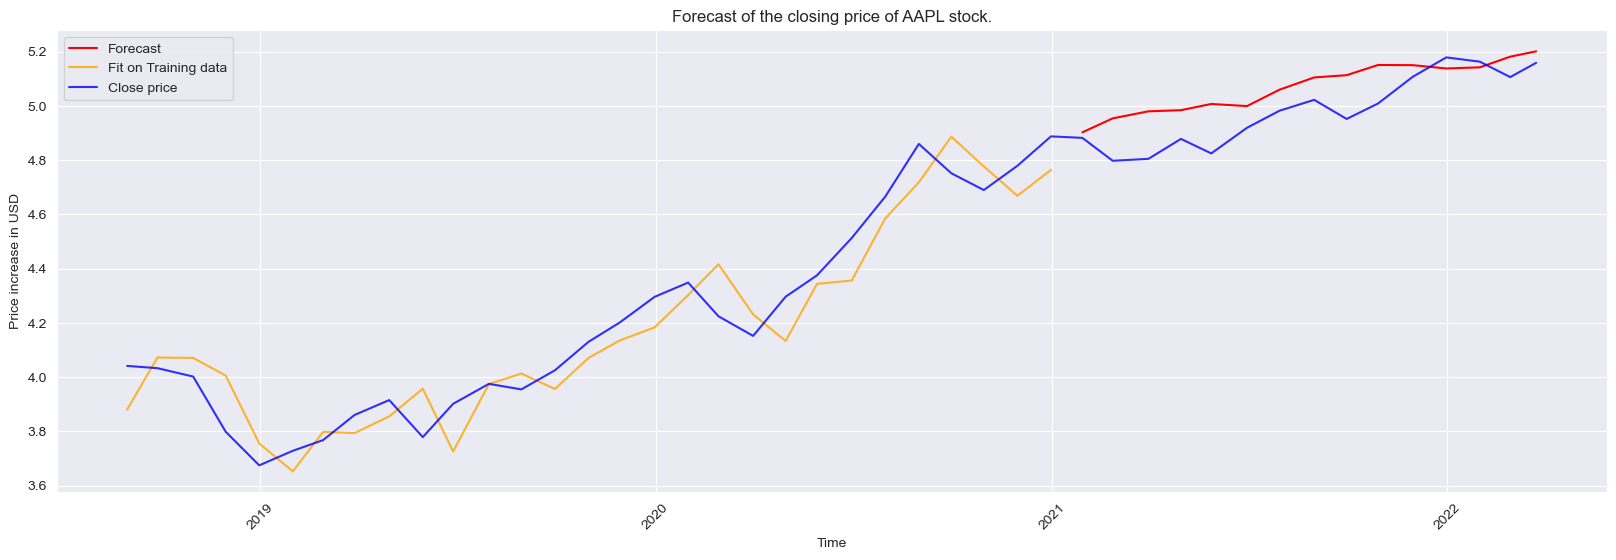

0.055207503727431384
0.011798042263237883
0.0923882326173138
0.0937610973944775


In [331]:
forecast = model.forecast(15, exog = None)
plt.figure(figsize=(20,6))
plt.plot(df_test['Date'][100:], df_test['Log_Close'][100:], color='blue')
plt.plot(df_test['Date'], forecast, label = 'Forecast', color='red')
plt.plot(df_train['Date'][100:], predicted[100:], label = 'Fit on Training data', color='orange', alpha = 0.8)
plt.plot(df['Date'][100:], df['Log_Close'][100:], label = 'Close price', color='blue', alpha= 0.8)

# plt.plot(df_test['Date'], forecast, label = 'Prediction', color='yellow')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Forecast of the closing price of AAPL stock.")
plt.legend()
plt.savefig(f"final_pred.pdf", format="pdf", dpi=500, bbox_inches = "tight")

plt.show()



print(MSE(df_train['Log_Close'], predicted))
print(MSE(df_test['Log_Close'], forecast))


print(MAE(df_train['Log_Close'], predicted))
print(MAE(df_test['Log_Close'], forecast))

In [303]:
df_train.shape

(129, 14)

In [330]:
coefficients = model.summary()
print(coefficients)

                                      SARIMAX Results                                       
Dep. Variable:                            Log_Close   No. Observations:                  129
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 118.693
Date:                              Mon, 03 Jun 2024   AIC                           -229.387
Time:                                      21:35:03   BIC                           -218.372
Sample:                                           0   HQIC                          -224.916
                                              - 129                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1088      0.087      1.258      0.208      -0.061       0.278
ar.S.L12      -0.06

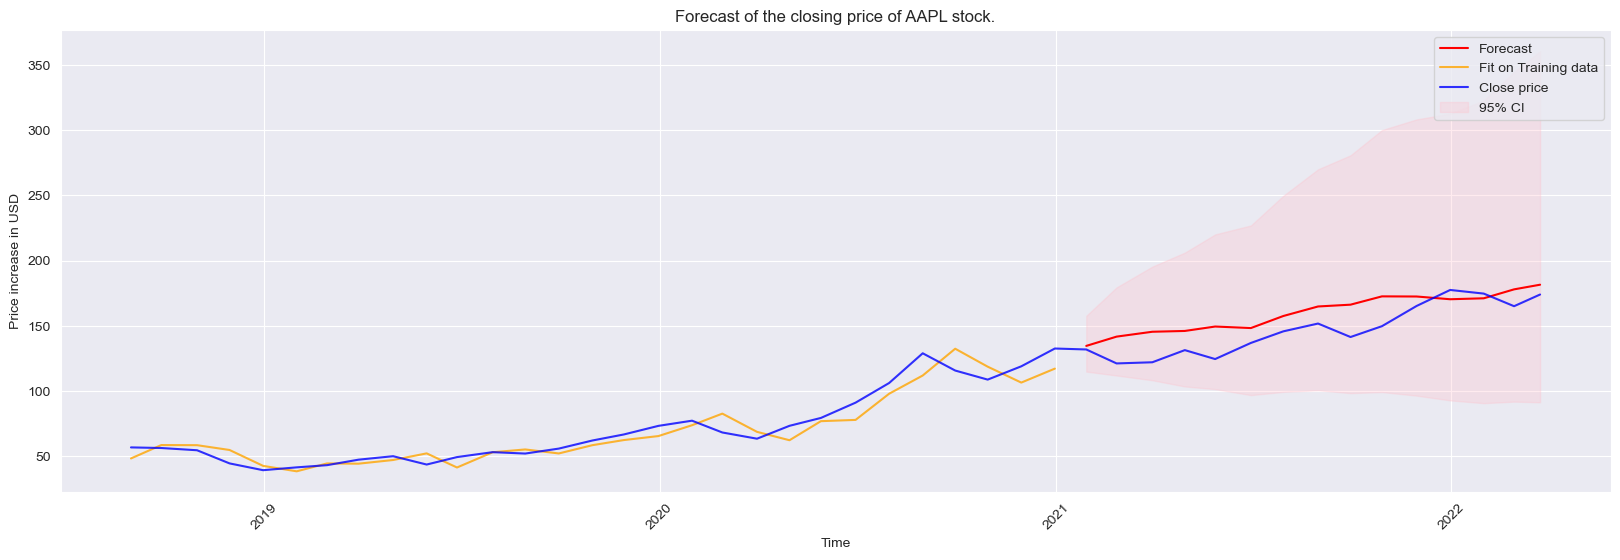

21.294197914687885
248.66635059450024
2.8924623527451527
13.905996311416258


In [306]:
# forecast = model.forecast(15, exog = None)
plt.figure(figsize=(20,6))
plt.plot(df_test['Date'][100:], np.exp(df_test['Log_Close'])[100:], color='blue')
plt.plot(df_test['Date'], np.exp(forecast), label = 'Forecast', color='red')
plt.plot(df_train['Date'][100:], np.exp(predicted)[100:], label = 'Fit on Training data', color='orange', alpha = 0.8)
plt.plot(df['Date'][100:], np.exp(df['Log_Close'])[100:], label = 'Close price', color='blue', alpha= 0.8)
plt.fill_between(df_test['Date'], lower_ci, upper_ci, color='pink', alpha=0.3, label='95% CI')

# plt.plot(df_test['Date'], forecast, label = 'Prediction', color='yellow')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.xticks(rotation=45)
plt.ylabel('Price increase in USD')
plt.xlabel('Time')
plt.title("Forecast of the closing price of AAPL stock.")
plt.legend()
plt.savefig(f"final_pred_close.pdf", format="pdf", dpi=500, bbox_inches = "tight")

plt.show()

print(MSE(np.exp(df_train['Log_Close'][13:]), np.exp(predicted)[13:]))
print(MSE(np.exp(df_test['Log_Close']), np.exp(forecast)))


print(MAE(np.exp(df_train['Log_Close'][13:]), np.exp(predicted)[13:]))
print(MAE(np.exp(df_test['Log_Close']), np.exp(forecast)))